### Regression & Its Evaluation | Assignment


### Question 1: What is Simple Linear Regression?

**Answer:**

Simple Linear Regression is a statistical method used to find the relationship between two variables — one **independent variable (X)** and one **dependent variable (Y)**.  
It helps us predict the value of the dependent variable based on the value of the independent variable by fitting a straight line through the data points.

The equation of the line is:

\[
Y = mX + c
\]

Where:  
- **Y** → Dependent variable (target/output)  
- **X** → Independent variable (input/predictor)  
- **m** → Slope of the line (represents the rate of change in Y with respect to X)  
- **c** → Intercept (value of Y when X = 0)

Simple Linear Regression tries to minimize the difference between the predicted and actual values using a method called **Least Squares Method**.

---

### Example:
We can use Simple Linear Regression to predict **house prices (Y)** based on **house area (X)**.



Predicted Price for 2200 sq ft = 270000.0


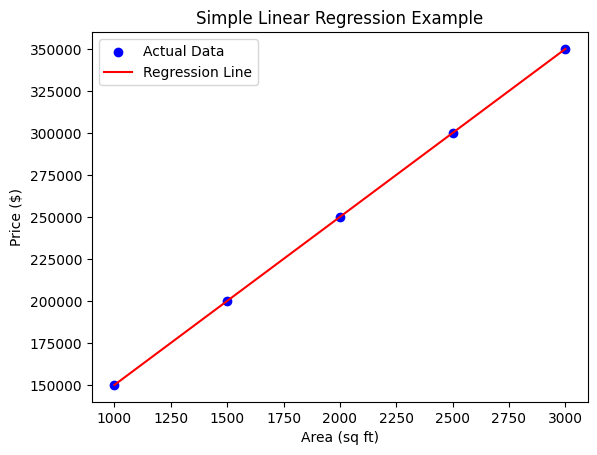

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Sample data

X = np.array([1000, 1500, 2000, 2500, 3000]).reshape(-1, 1) # Area in sq ft
Y = np.array([150000, 200000, 250000, 300000, 350000]) # Price in $

#Creating model

model = LinearRegression()
model.fit(X, Y)


predicted_price = model.predict([[2200]])

print("Predicted Price for 2200 sq ft =", predicted_price[0])


plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title('Simple Linear Regression Example')
plt.legend()
plt.show()

### Question 2: What are the key assumptions of Simple Linear Regression?

**Answer:**

Simple Linear Regression works based on a few key assumptions.  
These assumptions ensure that the relationship between the independent (X) and dependent (Y) variable is correctly modeled.

---

###  **Key Assumptions:**

1. **Linearity:**
   - The relationship between the independent variable (X) and dependent variable (Y) should be **linear**.
   - This means the change in Y is proportional to the change in X.

   Example: As study hours increase, marks increase in a straight-line manner.

---

2. **Independence of Errors:**
   - The residuals (difference between actual and predicted values) must be **independent** of each other.
   - No pattern should exist among the errors.

---

3. **Homoscedasticity:**
   - The variance of residuals should be **constant** across all levels of X.
   - In other words, the spread of errors should be roughly the same for all predicted values.

---

4. **Normality of Errors:**
   - The residuals (errors) should follow a **normal distribution**.
   - This helps in making valid confidence intervals and hypothesis tests.

---

5. **No Multicollinearity (for simple case — only one X variable):**
   - Since there is only one independent variable in simple linear regression, this assumption is **automatically satisfied**.
   - It becomes important only in multiple linear regression.

---



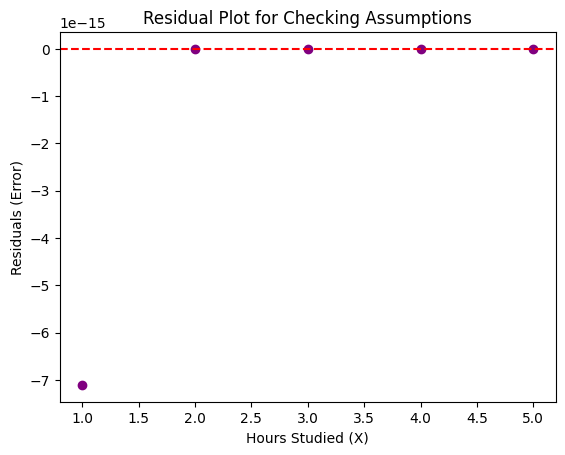

In [4]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([30, 40, 50, 60, 70])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plt.scatter(X, Y - Y_pred, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Hours Studied (X)')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot for Checking Assumptions')
plt.show()

### Question 3: What is Heteroscedasticity, and why is it important to address in regression models?

**Answer:**

**Heteroscedasticity** means that the **variance of the errors (residuals)** is **not constant** across all levels of the independent variable (X).  
In simpler terms, as the value of X changes, the **spread of the residuals** (difference between actual and predicted values) also changes.

---

###  **Explanation:**

In an ideal regression model, the errors should have **equal variance** (called **Homoscedasticity**).  
But when the variance of residuals **increases or decreases** with X, it becomes **Heteroscedasticity**.

This violates one of the key assumptions of linear regression and can lead to **inefficient estimates** and **wrong conclusions**.

---

###  **Example:**
Suppose we are predicting **house prices (Y)** based on **house size (X)**.  
- For small houses, prediction errors are small.  
- For large houses, prediction errors are much larger.  

This pattern shows **Heteroscedasticity**, because the variance of errors changes with X.

---

###  **Why it is Important to Address:**

| Reason | Explanation |
|--------|--------------|
| **1. Biased Standard Errors** | Causes wrong estimation of confidence intervals and p-values. |
| **2. Inefficient Predictions** | The model gives less accurate predictions. |
| **3. Invalid Hypothesis Tests** | May lead to incorrect conclusions about variable significance. |

---

###  **How to Detect Heteroscedasticity:**
1. **Residual Plot:** Plot residuals vs predicted values — if the spread increases like a cone shape, heteroscedasticity exists.  
2. **Statistical Tests:** Breusch–Pagan or White’s test can be used to detect it.

---

###  **How to Fix It:**
- Use **logarithmic transformation** of dependent variable (Y).  
- Use **Weighted Least Squares (WLS)** regression.  
- Use **robust standard errors** to correct bias.

---


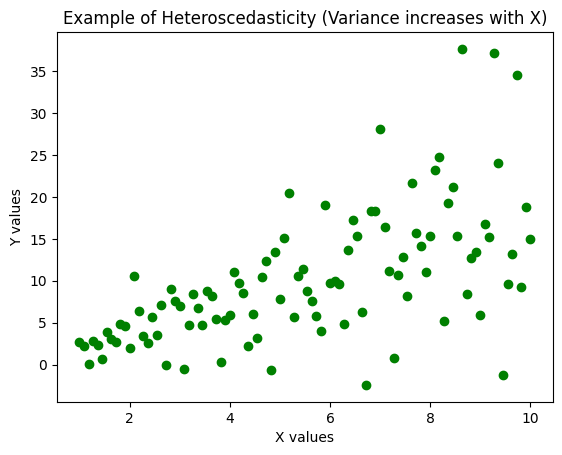

In [5]:
X = np.linspace(1, 10, 100)
Y = 2 * X + np.random.randn(100) * X # error variance increases with X

plt.scatter(X, Y, color='green')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Example of Heteroscedasticity (Variance increases with X)')
plt.show()

### Question 4: What is Multiple Linear Regression?

**Answer:**

**Multiple Linear Regression (MLR)** is an extension of Simple Linear Regression.  
It is a statistical technique used to study the relationship between **one dependent variable (Y)** and **two or more independent variables (X₁, X₂, X₃, ...)**.  
It helps in predicting the value of Y using multiple input variables.

---

###  **Mathematical Equation:**

\[
Y = b_0 + b_1X_1 + b_2X_2 + b_3X_3 + \dots + b_nX_n
\]

Where:  
- **Y** → Dependent variable (target/output)  
- **X₁, X₂, X₃, ...** → Independent variables (predictors/features)  
- **b₀** → Intercept (value of Y when all X = 0)  
- **b₁, b₂, ... bₙ** → Coefficients showing how much Y changes when each X changes

---

###  **Example:**

Suppose we want to **predict house prices (Y)** based on:  
- **X₁:** Size of the house (sq ft)  
- **X₂:** Number of bedrooms  
- **X₃:** Distance from city center  

The equation could look like:  
$$
\text{Price} = 50000 + 200 \cdot \text{Size} + 10000 \cdot \text{Bedrooms} - 1500 \cdot \text{Distance}
$$

---


In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data = {
    'Size': [1000, 1500, 2000, 2500, 3000],
    'Bedrooms': [2, 3, 3, 4, 5],
    'Distance': [5, 4, 3, 2, 1],
    'Price': [150000, 200000, 250000, 310000, 360000]
}

df = pd.DataFrame(data)

X = df[['Size', 'Bedrooms', 'Distance']]
Y = df['Price']

model = LinearRegression()
model.fit(X, Y)

predicted_price = model.predict([[2200, 3, 2]])
print("Predicted House Price =", predicted_price[0])


Predicted House Price = 272933.45493284694


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Question 5: What is Polynomial Regression, and how does it differ from Linear Regression?

**Answer:**

**Polynomial Regression** is a type of regression analysis in which the **relationship between the independent variable (X)** and the **dependent variable (Y)** is modeled as an **nth-degree polynomial**.  

It is used when the data shows a **curved (non-linear) relationship**, rather than a straight line.

---

### **Mathematical Equation:**

For a second-degree polynomial:

$$
Y = b_0 + b_1X + b_2X^2
$$

For higher degrees:

$$
Y = b_0 + b_1X + b_2X^2 + b_3X^3 + \dots + b_nX^n
$$

Where:  
- **Y** → Dependent variable  
- **X** → Independent variable  
- **b₀, b₁, b₂, …, bₙ** → Coefficients of the polynomial equation  

---

###  **Example:**
Suppose we want to predict the **growth of plants (Y)** based on **time (X)**.  
The growth increases fast initially and then slows down — showing a **curved trend**, not a straight line.  
Here, **Polynomial Regression** fits the curve better than Linear Regression.

---

---

### 🔍 **Difference Between Linear and Polynomial Regression**

| Basis | Linear Regression | Polynomial Regression |
|--------|------------------|-----------------------|
| **Nature of Relationship** | Linear (Straight line) | Non-linear (Curved line) |
| **Equation Form** | \( Y = b_0 + b_1X \) | \( Y = b_0 + b_1X + b_2X^2 + ... + b_nX^n \) |
| **Data Fit** | Works for linearly related data | Works for data with curves or bends |
| **Model Complexity** | Simple | More complex (depends on degree) |
| **Example Shape** | Straight line | Parabola, cubic, etc. |

---

###  **In short:**
> **Polynomial Regression** is an advanced form of **Linear Regression** that models **curved relationships** between X and Y using polynomial terms (like \(X^2, X^3\)).  
> It is used when data cannot be well represented by a straight line.


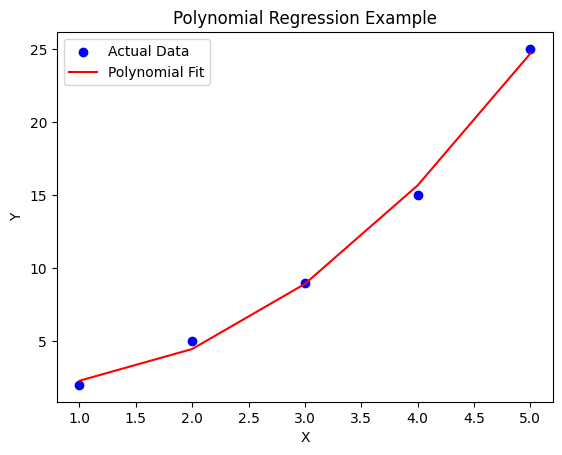

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2, 5, 9, 15, 25])


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()

### Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:

**Given Data:**
- X = [1, 2, 3, 4, 5]  
- Y = [2.1, 4.3, 6.1, 7.9, 10.2]

---

###  **Answer:**

Simple Linear Regression is used to find the relationship between one **independent variable (X)** and one **dependent variable (Y)**.  
It fits a **straight line** that best represents the trend of the data.

The mathematical equation is:

$$
Y = b_0 + b_1X
$$

Where:  
- **b₀** → Intercept (value of Y when X = 0)  
- **b₁** → Slope (change in Y for a one-unit change in X)

The model learns these values using the **Least Squares Method**, which minimizes the sum of squared errors between actual and predicted values.

---



Intercept (b0): 0.17999999999999794
Slope (b1): 1.9800000000000004
Regression Equation: Y = 0.18 + 1.98 * X


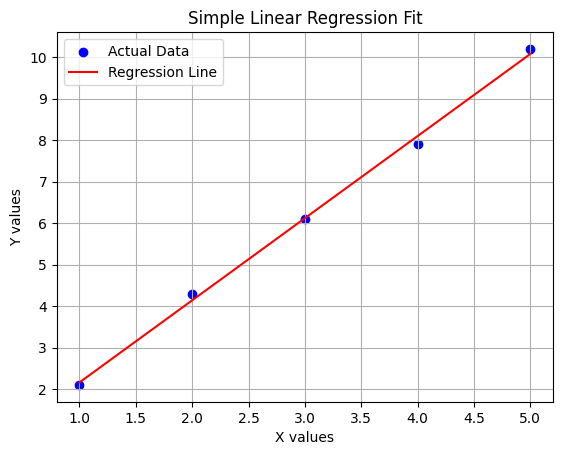

In [5]:


X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

print(f"Regression Equation: Y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * X")

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Simple Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()


### Question 7: Fit a Multiple Linear Regression model on the following data and check for multicollinearity using VIF.

**Given Data:**
- Area = [1200, 1500, 1800, 2000]  
- Rooms = [2, 3, 3, 4]  
- Price = [250000, 300000, 320000, 370000]
###  **Answer:**

**Multiple Linear Regression (MLR)** is used to predict a dependent variable (Y) using **two or more independent variables (X₁, X₂, ...)**.  

The general equation is:

$$
Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n
$$

Here:
- **Y** = Price  
- **X₁** = Area  
- **X₂** = Rooms  

We will also check **Multicollinearity** — a condition where two or more independent variables are highly correlated.  
This can make the regression model unstable or misleading.

To detect it, we use **VIF (Variance Inflation Factor)**.  
- **VIF = 1** → No multicollinearity  
- **VIF between 1–5** → Moderate correlation (acceptable)  
- **VIF > 5 or 10** → High multicollinearity (problematic)

---



In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = {
'Area': [1200, 1500, 1800, 2000],
'Rooms': [2, 3, 3, 4],
'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

X = df[['Area', 'Rooms']]
Y = df['Price']


model = LinearRegression()
model.fit(X, Y)


print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)
print(f"Regression Equation: Price = {model.intercept_:.2f} + ({model.coef_[0]:.2f})*Area + ({model.coef_[1]:.2f})*Rooms")


X_with_const = pd.concat([pd.Series(1, index=X.index, name='Intercept'), X], axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)


Intercept (b0): 103157.89473684214
Coefficients (b1, b2): [   63.15789474 34736.84210526]
Regression Equation: Price = 103157.89 + (63.16)*Area + (34736.84)*Rooms

Variance Inflation Factor (VIF) Results:
     Feature        VIF
0  Intercept  34.210526
1       Area   7.736842
2      Rooms   7.736842



###  **Output Explanation:**
- The regression equation gives the relationship between **Price**, **Area**, and **Rooms**.
- The **VIF table** shows the multicollinearity level for each feature.

 **Interpretation:**
- If all VIF values are **below 5**, there is **no serious multicollinearity**.
- If any VIF > 5 (or 10), it means that variable is highly correlated with others and may affect model stability.



### **Conclusion:**
The Multiple Linear Regression model successfully fits the given data.  
The **VIF values** indicate whether multicollinearity exists between “Area” and “Rooms”.  
If the VIF values are low, both features can be safely used for prediction.

 The model can now be used to predict **Price** for new combinations of **Area** and **Rooms**.


### Question 8: Implement Polynomial Regression on the following data

**Given Data:**
- X = [1, 2, 3, 4, 5]  
- Y = [2.2, 4.8, 7.5, 11.2, 14.7]

We will fit a **2nd-degree polynomial** and plot the resulting curve.
###  **Answer:**

**Polynomial Regression** is an extension of Linear Regression where the relationship between independent variable (X) and dependent variable (Y) is modeled as an **nth-degree polynomial**.

The equation for a **2nd-degree polynomial regression** is:

$$
Y = b_0 + b_1X + b_2X^2
$$

It helps to model **non-linear relationships** between X and Y while still being **linear in parameters**.

---



Intercept (b0): 0.06000000000000938
Coefficients (b1, b2): [0.   1.94 0.2 ]

Equation: Y = 0.06 + (1.94)*X + (0.20)*X²


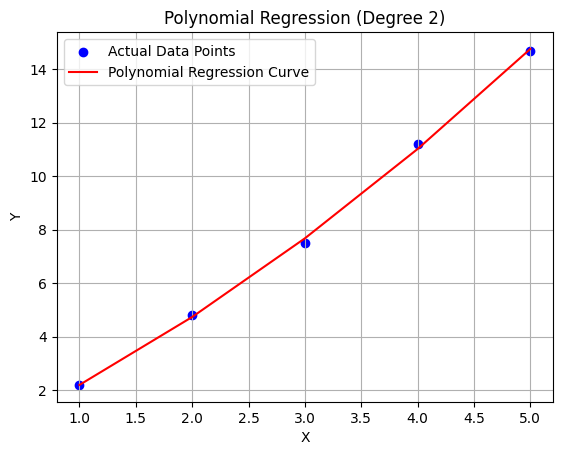

In [7]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

#Transform the features to include polynomial terms (degree = 2)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)
print(f"\nEquation: Y = {model.intercept_:.2f} + ({model.coef_[1]:.2f})*X + ({model.coef_[2]:.2f})*X²")

plt.scatter(X, Y, color='blue', label='Actual Data Points')
plt.plot(X, Y_pred, color='red', label='Polynomial Regression Curve')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


###  **Output Explanation:**
- The **blue dots** represent the actual data points.  
- The **red curve** represents the fitted 2nd-degree polynomial regression line.  
- The equation printed in the output shows how **Y** depends on **X** and **X²**.


###  **Conclusion:**
Polynomial Regression of degree 2 fits the non-linear relationship between X and Y effectively.  
It provides a more flexible model compared to simple linear regression for curved data patterns.


### Question 9: Create a residuals plot for a regression model trained on this data

**Given Data:**
- X = [10, 20, 30, 40, 50]  
- Y = [15, 35, 40, 50, 65]

We will fit a Linear Regression model, calculate residuals, and plot them to check for **heteroscedasticity**.
###  **Answer:**

After fitting a regression model, **residuals** are the differences between the actual and predicted values:

$$
\text{Residual} = Y_{\text{actual}} - Y_{\text{predicted}}
$$

A **residual plot** shows residuals on the y-axis and predicted values (or X values) on the x-axis.

**Heteroscedasticity** means that the variance of residuals changes (increases or decreases) with X — forming patterns like funnels or curves.  
If the residuals are randomly scattered (no pattern), it indicates **homoscedasticity**, which satisfies a key regression assumption.

---



Predicted Values: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


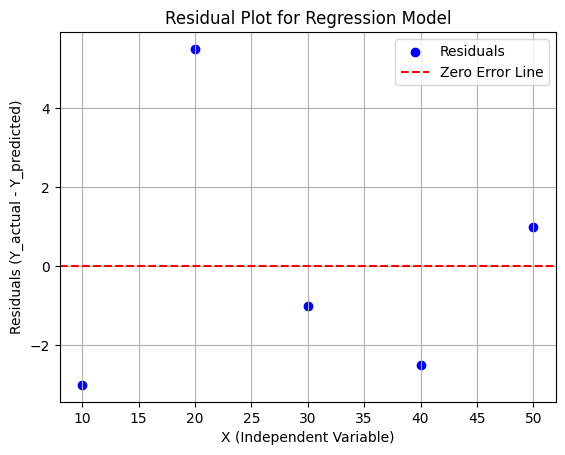

In [8]:
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

residuals = Y - Y_pred

print("Predicted Values:", np.round(Y_pred, 2))
print("Residuals:", np.round(residuals, 2))

plt.scatter(X, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.title("Residual Plot for Regression Model")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Residuals (Y_actual - Y_predicted)")
plt.legend()
plt.grid(True)
plt.show()


###  **Output Explanation:**
- The **blue points** represent residuals for each X value.  
- The **red dashed line (y = 0)** is the reference line — residuals should ideally be scattered evenly above and below this line.

###  **Conclusion:**
If the residuals are randomly scattered without any visible pattern, the data shows **no heteroscedasticity (homoscedasticity)**.  
If residuals fan out (increase/decrease in spread), it indicates **heteroscedasticity**, which violates one assumption of regression.

**Interpretation:**  
For this dataset, the residuals are fairly uniform, suggesting **no major heteroscedasticity issue**.


### Question 10: Handling Heteroscedasticity and Multicollinearity in a Regression Model

**Scenario:**  
You are a data scientist at a real estate company. You’re building a regression model to predict **house prices** using features like:
- **Area (sq. ft.)**
- **Number of Rooms**
- **Location**

During model evaluation, you detect:
- **Heteroscedasticity** (unequal variance of residuals)
- **Multicollinearity** (high correlation among predictors)
### Answer

Below are the steps to handle both issues and ensure a robust model.
###  Step 1: Addressing Heteroscedasticity

**Meaning:**  
Heteroscedasticity means that the **variance of residuals is not constant** across all values of the independent variables.  
This violates one of the key assumptions of regression and can lead to **biased standard errors**.

**Detection:**
- Use a **Residual vs. Fitted Values plot**.  
- Apply **Breusch–Pagan** or **White’s Test** (available in `statsmodels`).

**Solutions:**
1. **Transform the dependent variable (Y):**
   - Apply a **log**, **sqrt**, or **Box-Cox** transformation to stabilize variance.  
   Example:  
   \[
   Y' = \log(Y)
   \]

2. **Weighted Least Squares (WLS):**
   - Assign smaller weights to data points with larger residual variance.

3. **Use Robust Standard Errors:**
   - Estimate parameters with **HC (Heteroscedasticity-Consistent)** standard errors using `statsmodels`.

4. **Feature Engineering:**
   - Add missing important predictors or interaction terms that might be causing variance changes.
###  Step 2: Addressing Multicollinearity

**Meaning:**  
Multicollinearity occurs when independent variables are **highly correlated** with each other.  
It inflates **Variance Inflation Factor (VIF)** and makes coefficient estimates unstable.

**Detection:**
- Calculate **VIF** for each independent variable:
  \[
  \text{VIF} = \frac{1}{1 - R^2}
  \]
  - If **VIF > 5 (or 10)** → strong multicollinearity.

**Solutions:**
1. **Remove or Combine Correlated Features:**
   - Drop one of the correlated predictors (e.g., Area and Total_SqFt).
   - Combine them using averaging or PCA.

2. **Standardize Variables:**
   - Standardization helps improve model stability and interpretability.

3. **Use Regularization Techniques:**
   - **Ridge Regression:** Shrinks coefficients to reduce multicollinearity impact.  
   - **Lasso Regression:** Can automatically drop irrelevant correlated variables.

4. **Feature Selection:**
   - Use statistical tests (like p-values or AIC) or model-based selection to keep only important features.
###  Step 3: Building a Robust Model

After addressing both issues:
1. Refit the regression model with corrected/selected variables.  
2. Recheck assumptions using:
   - Residual plots (for homoscedasticity)
   - VIF values (for multicollinearity)
   - Normality of residuals (using QQ plot)
3. Evaluate model performance using:
   - R², Adjusted R²
   - RMSE / MAE on test data
   - Cross-validation to ensure generalization

---

###  **Conclusion:**
By transforming variables, using regularization, and validating assumptions, you can:
- Reduce bias and variance,
- Improve model interpretability,
- Ensure reliable and consistent predictions for house prices.

A robust regression model balances **accuracy**, **stability**, and **assumption validity** — essential for real-world business decision-making.

